In [90]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [91]:
df = pd.read_csv('HousingData.csv')
df.shape
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [58]:
df.tail(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [59]:
# df[pd.to_numeric(df.CHAS, errors='coerce').isnull()]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [92]:
df.CRIM = df['CRIM'].fillna(df['CRIM'].mean())
df.ZN = df['ZN'].fillna(df.ZN.median())
df.INDUS = df['INDUS'].fillna(df.INDUS.median())
df.CHAS = df['CHAS'].fillna(df.CHAS.median())
df.AGE = df['AGE'].fillna(df.AGE.mean())
df.LSTAT = df['LSTAT'].fillna(df.LSTAT.mean())
# df.dropna(inplace=True)
# df
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [30]:
# df1 = df.drop(['ZN','INDUS','CHAS','DIS','RAD','PTRATIO','B'], axis=1)
# df1.AGE = df1.AGE / 100

# min1 = df1.RM.min()
# max1 = df1.RM.max()
# df1['RM'] = (df1['RM'] - min1) / (max1 - min1)

# min2 = df1.TAX.min()
# max2 = df1.TAX.max()
# df1.TAX = (df1.TAX - min2) / (max2 - min2) 

# min3 = df1.LSTAT.min()
# max3 = df1.LSTAT.max()
# df1.LSTAT = (df1.LSTAT - min3) / (max3 - min3)

# min4 = df1.MEDV.min()
# max4 = df1.MEDV.max()
# df1.MEDV = (df1.MEDV - min4) / (max4 - min4)
# for i in df1.iterrows():
#     df1.RM[i] = (df1.RM[i] - min) / (max - min)

# df1.head(10)

,CRIM,NOX,RM,AGE,TAX,LSTAT,MEDV
0,0.00632,0.538,6.575,65.2,296,4.980000,24.0
1,0.02731,0.469,6.421,78.9,242,9.140000,21.6
2,0.02729,0.469,7.185,61.1,242,4.030000,34.7
3,0.03237,0.458,6.998,45.8,222,2.940000,33.4
4,0.06905,0.458,7.147,54.2,222,12.715432,36.2
5,0.02985,0.458,6.430,58.7,222,5.210000,28.7
6,0.08829,0.524,6.012,66.6,311,12.430000,22.9
7,0.14455,0.524,6.172,96.1,311,19.150000,27.1
8,0.21124,0.524,5.631,100.0,311,29.930000,16.5
9,0.17004,0.524,6.004,85.9,311,17.100000,18.9


In [93]:
X = df1.drop('MEDV', axis=1).values
y = df1['MEDV'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

type(X_scaled)
# y.shape
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Standardize the feature values
# scaler = StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

# df1.corr()

In [97]:
# 1. Build the model
model1 = Sequential([
    Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(units=1, activation='linear')   # single-output for regression
])

# 2. Compile for regression (no 'accuracy')
model1.compile(
    optimizer='adam',
    loss='mse',        # mean squared error loss
    metrics=['mae']    # mean absolute error metric
)

# 3. Train (with validation split to monitor overfitting)
history = model1.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

# 4. Predict & flatten for sklearn metrics
y_pred = model.predict(X_test).flatten()

# 5a. Evaluate with sklearn metrics
mse_skl = mean_squared_error(y_test, y_pred)
r2_skl  = r2_score(y_test, y_pred)
print(f"Scikit-learn → Test MSE: {mse_skl:.4f}, R²: {r2_skl:.4f}")


Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 623.5709 - mae: 22.8205 - val_loss: 552.4384 - val_mae: 21.8621
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 618.2050 - mae: 22.9318 - val_loss: 537.7127 - val_mae: 21.5393
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 583.5634 - mae: 21.8342 - val_loss: 522.7895 - val_mae: 21.2008
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 581.2653 - mae: 21.9688 - val_loss: 507.1376 - val_mae: 20.8478
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 532.4707 - mae: 21.0460 - val_loss: 490.5627 - val_mae: 20.4697
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 573.2394 - mae: 21.8113 - val_loss: 472.0993 - val_mae: 20.0475
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 525.1953 - mae: 20.7686 - val_loss: 451.8399 - val_mae: 19.5833
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 507.7434 - mae: 20.4130 - val_loss: 429.9155 - val_mae: 19.0695
Epoch 9/30
21/21 ━

In [99]:
model2 = Sequential([
    Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(units=32,  activation='relu'),
    Dense(units=1, activation='linear')
])

# 2. Compile for regression (no 'accuracy')
model2.compile(
    optimizer='adam',
    loss='mse',        # mean squared error loss
    metrics=['mae']    # mean absolute error metric
)

# 3. Train (with validation split to monitor overfitting)
history = model2.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 596.0060 - mae: 22.3939
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 519.8026 - mae: 20.9915
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 452.8777 - mae: 19.0841
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 312.5358 - mae: 15.4600
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 169.0783 - mae: 10.8987
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 88.6678 - mae: 6.8959  
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 36.6647 - mae: 4.2516
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30.4762 - mae: 4.2070
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.0132 - mae: 3.8012
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33.3917 - mae: 4.1195
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22.6271 - mae: 3.5186
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.9160 - mae: 3.6593
Epoch 13/50
26/26 ━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MSE for Model 1 (1 layer, 32 units): 56.6777
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
MSE for Model 2 (2 layers, 64 & 32 units): 16.7206


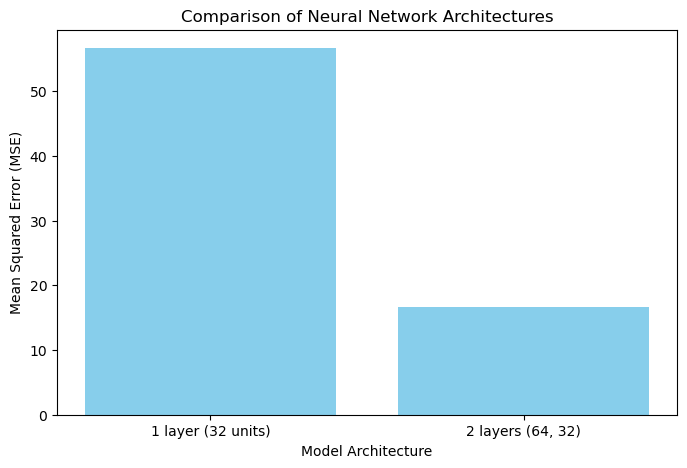

In [100]:
# Model 1 evaluation
y_pred1 = model1.predict(X_test).flatten()
mse1 = mean_squared_error(y_test, y_pred1)
print(f"MSE for Model 1 (1 layer, 32 units): {mse1:.4f}")

# Model 2 evaluation
y_pred2 = model2.predict(X_test).flatten()
mse2 = mean_squared_error(y_test, y_pred2)
print(f"MSE for Model 2 (2 layers, 64 & 32 units): {mse2:.4f}")

# Plotting the results
models = ['1 layer (32 units)', '2 layers (64, 32)']
mses = [mse1, mse2]

plt.figure(figsize=(8, 5))
plt.bar(models, mses, color='skyblue')
plt.xlabel('Model Architecture')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Neural Network Architectures')
plt.show()
